In [57]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

Halloween may be over but my favorite time of year is here - when candy is heavily discounted after Halloween! Let's look at a dataset that looks at how much people like different candies.

In [4]:
df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/candy-power-ranking/candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Each row in the dataset is a different candy. There are several categorial variables marked as either 1 or 0 that lets us know whether a certain candy fits in that category (1 being yes and 0 being no). For example, 100 grand has chocolate in it while Air Heads do not.

1) How many candies are in this dataset?

In [34]:
CandyCount = 0
for idx, val in enumerate(df["competitorname"]):
    if(df["chocolate"][idx] == 1 or df["fruity"][idx] == 1 or df["caramel"][idx] == 1 or df["peanutyalmondy"][idx] ==1 or df["nougat"][idx] ==1 or df["crispedricewafer"][idx] == 1):
        CandyCount += 1
print("There are ", CandyCount, "candies in this dataset")

There are  79 candies in this dataset


2) How many candies have chocolate in them? How many don't?

In [35]:
count = 0
for idx, val in enumerate(df["competitorname"]):
    if(df["chocolate"][idx] == 1):
        count += 1
print("There are ", count, "candies that have chocolate in them")
print("There are", CandyCount-count, "candies that don't have chocolate in them")

There are  37 candies that have chocolate in them
There are 42 candies that don't have chocolate in them


3) Let's call the last column - the 'winpercent' column - equivalent to an approval rating for a given candy.

What is the mean 'approval rating' for candies with chocolate? What is the mean 'approval rating' for candies without chocolate? What is the difference in these mean approval ratings (with chocolate minus without chocolate)?

In [47]:
chocolate_winners = df[df['chocolate'] == 1]['winpercent']
non_chocolate_winners = df[df['chocolate'] == 0]['winpercent']
chocolate_winners_mean = np.mean(chocolate_winners)
non_chocolate_winners_mean = np.mean(non_chocolate_winners)
print("The mean 'approval rating' for candies with chocolate is", chocolate_winners_mean)
print("The mean 'approval rating' for candies without chocolate",non_chocolate_winners_mean)
print("The difference in these mean approval ratings is ", chocolate_winners_mean - non_chocolate_winners_mean)

The mean 'approval rating' for candies with chocolate is 60.9215294054054
The mean 'approval rating' for candies without chocolate 42.142257
The difference in these mean approval ratings is  18.7792724054054


4) Say that we want to see if there is a *difference* in approval rating between candies with chocolates and candies without chocolates. In this case, what is our null hypothesis and our alternate hypothesis?

null hypothesis : There is no difference in approval rating between candies with chocolates and candies without chocolates.
alternate hypothesis: There is a difference in approval rating between candies with chocolates and candies without chocolates.

5) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the chocolate approval ratings and non-chocolate approval ratings, shuffle them, and then break out new chocolate approval ratings and non-chocolate approval ratings, similar to what we did last week in class (**note that you can use the bootstrap_mean_diff function we covered this week in the class for running a bootstrap**). Record the mean difference between the chocolate approval ratings and non-chocolate approval ratings.

Plot a histogram of the 10,000 simulated differences recorded. What is the average simulated difference?

The average stimulated difference is -0.005051429525618676


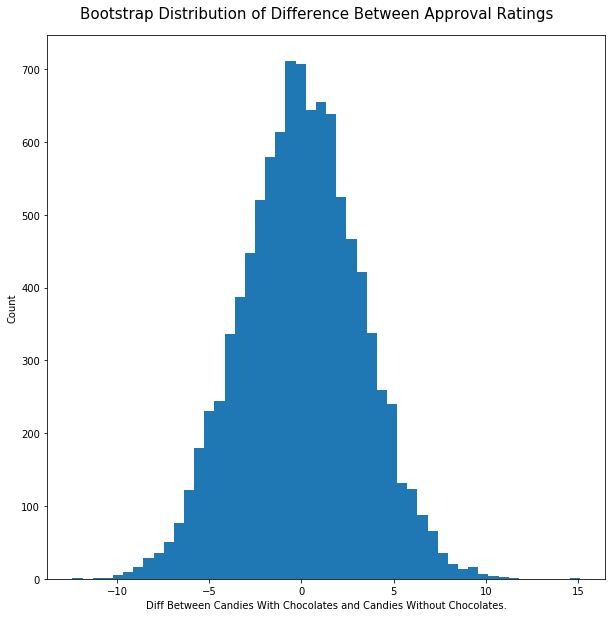

In [54]:
diff = utils.bootstrap_mean_diff(chocolate_winners, non_chocolate_winners)
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between Candies With Chocolates and Candies Without Chocolates.')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Approval Ratings', fontsize=15, y=0.92)
print("The average stimulated difference is", np.mean(diff))

6) Say you are running a two-tailed hypothesis test, where the null hypothesis is that there is no difference in the approval rating for chocolate candies and non-chocolate candies, and the alternate hypothesis is that there is a difference in the approval rating.

If the test is at the 0.05 significance level, what are the rejection regions?

Where do the results you found earlier fit into the distribution? What is the percentile value? What is the p-value (remember, two-tailed)?

Can we reject the null hypothesis?

In [52]:
np.percentile(diff, 2.5)

-6.242496532446511

In [55]:
np.percentile(diff, 97.5)

6.322172290118249

We'll reject our null hypothesis if our value is less than -6.242496532446511 or greater than 6.322172290118249

7) Now let's use what we've learned the past two weeks. Plot a scatter plot between the percentage of sugar for *all* candies and the approval rating for *all* candies. What does the relationship look like? Do you think we need to transform the response variable?

Text(0.5, 0.92, 'Swarm Plot of the X Variable')

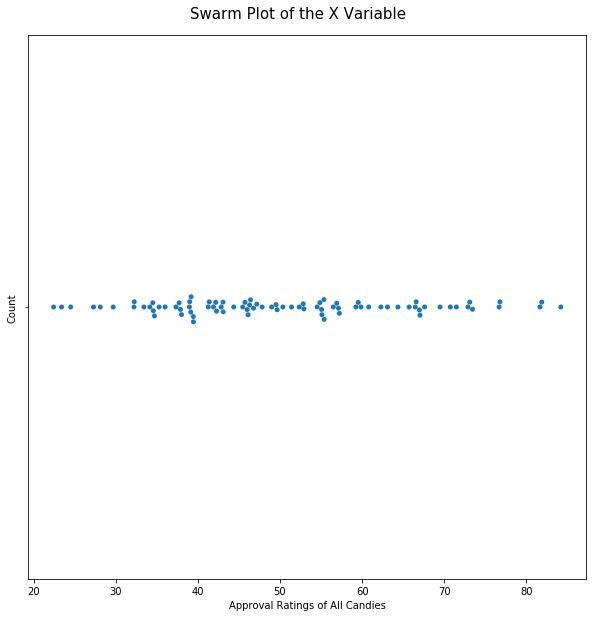

In [61]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(df['winpercent'])
plt.xlabel('Approval Ratings of All Candies')
plt.ylabel('Count')
fig.suptitle('Swarm Plot of the X Variable', fontsize=15, y=0.92)

No, we do not need to transform the response variable

8) What is the covariance between these two variables? What is the correlation? What does the correlation indicate about the strength of the relationship? Is the correlation statistically significant at a significance level of 0.05? (Note you do NOT have to calculate this, it is in the correlation output via stats.pearsonr)

In [67]:
df['chocolate_Deviation'] = df['chocolate'] - df['chocolate'].mean()
df['Approval_Deviation'] = df['winpercent'] - df['winpercent'].mean()
df['chocolate_Diff * Approval_Diff'] = df['chocolate_Deviation'] * df['Approval_Deviation']
print('Covariance:', np.round(df['chocolate_Diff * Approval_Diff'].mean(), 84))
print('Pearson Correlation:', np.round(stats.pearsonr(df['chocolate'], df['winpercent'])[0], 84))

Covariance: 4.616192081937718
Pearson Correlation: 0.6365167485397067


The strength of the relationship is not that strong. No, it is not statistically significant at a significance level of 0.05.

9) Using the 'evaluate linear relationship' package we found in class this week, find the slope, intercept, prediction and residuals for this relationship (with 'sugarpercent' being the X variable or independent variable and 'winpercent' being the Y variable or dependent variable. Re-plot the scatterplot with the predictive slope on top of it like we did in class.

In [80]:
xValues = df['sugarpercent'][:84]
yValues = df['winpercent'][:84]
slope = np.cov(xValues, yValues, bias=True)[0][1] / np.var(xValues)
intercept = np.mean(yValues) - (slope * np.mean(xValues))
predictions = (slope * xValues) + intercept
residuals = yValues - predictions
print('Slope:', slope)
print('intercept:', intercept)
print('predictions:', predictions)
print('residuals:', residuals)


Slope: 12.25652916243316
intercept: 44.51704312956554
predictions: 0     53.488822
1     51.919986
2     44.651865
3     44.651865
4     55.621459
5     50.216329
6     51.919986
7     48.353337
8     55.621459
9     51.919986
10    51.919986
11    53.488822
12    45.080843
13    53.488822
14    53.488822
15    46.073622
16    53.488822
17    55.621459
18    50.216329
19    50.216329
20    50.216329
21    50.216329
22    46.073622
23    49.787351
24    49.787351
25    49.787351
26    45.656900
27    46.931579
28    48.353337
29    47.213480
        ...    
54    56.626494
55    53.488822
56    55.057658
57    53.488822
58    55.204736
59    47.213480
60    56.050437
61    56.050437
62    47.789536
63    47.789536
64    51.209108
65    51.919986
66    45.362744
67    45.362744
68    46.367779
69    51.491008
70    56.344593
71    49.640272
72    46.502601
73    51.919986
74    51.919986
75    48.353337
76    46.649679
77    50.216329
78    48.353337
79    51.209108
80    47.213480
81   

Text(0.5, 0.92, 'Winpercent vs Sugar')

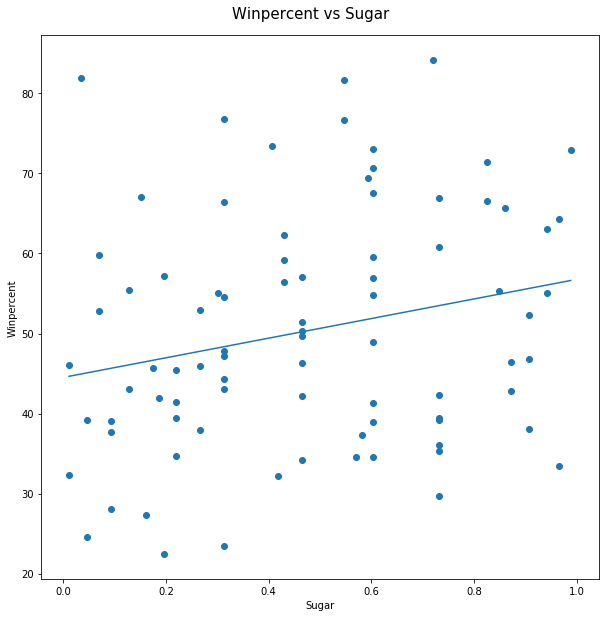

In [81]:
fig = plt.figure(figsize=(10,10))
plt.scatter(xValues, yValues)
sorted_order = np.argsort(xValues)
plt.plot(xValues[sorted_order], predictions[sorted_order])
plt.xlabel('Sugar')
plt.ylabel('Winpercent')
fig.suptitle('Winpercent vs Sugar', fontsize=15, y=0.92)

10) Now plot the residuals for the model like we did in class.

Text(0.5, 0.92, 'Residuals')

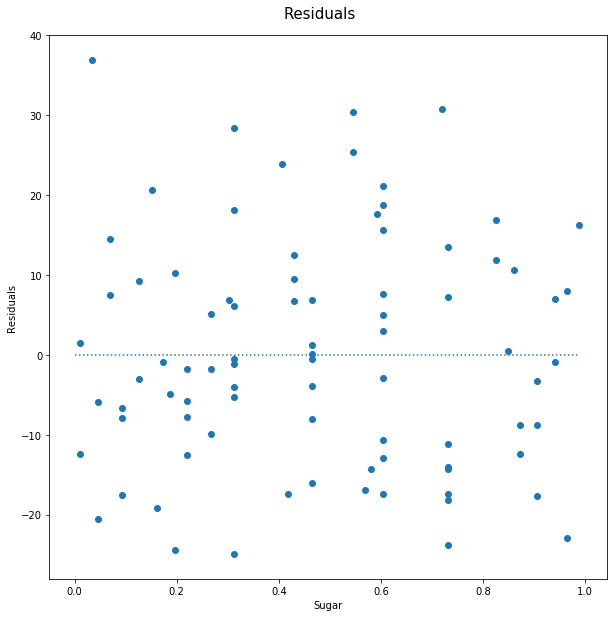

In [82]:
fig = plt.figure(figsize=(10,10))
plt.scatter(xValues, residuals)
plt.plot([0, xValues.max()], [0,0], linestyle='dotted')
plt.xlabel('Sugar')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

11) What is the R-squared value of the relationship between these two variables? What does this say when considered with the correlation of the two variables? (Consider what this plot looks like versus like the plots we went over in class)

In [83]:
np.var(predictions) / np.var(df['winpercent'])

0.05483272320389323

There is no correlation of the two variables.

BONUS: 12) Say we wanted to run the earlier hypothesis test (approval rating of chocolates vs. non-chocolates) with a two-sample T-test rather than a bootstrap test. 

Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [84]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))
pooled_var = custom_pooled_variance(chocolate_winners, non_chocolate_winners)
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 6.24
Pooled Standard Deviation: 2.5


In [86]:
degreesOfFreedome = len(chocolate_winners) + len(non_chocolate_winners) - 2
print(degreesOfFreedome)

83


In [87]:
np.mean(chocolate_winners) - np.mean(non_chocolate_winners)

18.7792724054054

BONUS: 13) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution? Make a plot highlighting these rejection region (s?) in red.

In [90]:
dist.ppf(0.025)

-5.247376745896654

In [91]:
dist.ppf(0.975)

5.247376745896654

Rejection Region: Less than -5.25
Rejection Region: Less than 5.25


Text(0.5, 0.92, 'T-Distribution of Difference Between Samples')

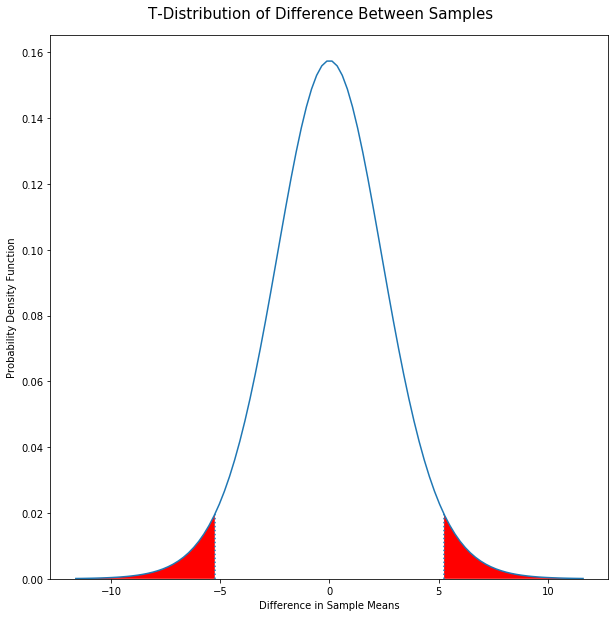

In [89]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=83)
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=18)
print('Rejection Region: Less than', np.round(dist.ppf(0.025), 2))
print('Rejection Region: Less than', np.round(dist.ppf(0.975), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

The rejection region is anything that falls below -5.247376745896654 and above 5.247376745896654

BONUS: 14) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

In [97]:
(1 - dist.cdf(18.7792724054054))*2

5.861293330688966e-07

Yes, we can reject the null hypothesis.